# Exercise 3 | TKO_2096 Applications of Data Analysis 2021

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=7 (7NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 7-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 7NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 7NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 200 (that is, 10 meter intervals from 0m to 200m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. Remember to also take advantage of earlier exercises (e.g. C-index). For the 7-nearest neighbor and Euclidean distance calculation you can use third-party libraries (e.g. Scikit-learn) if you want.  


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

In [1]:
#######
#
# THIS DOES RUN, BUT SLOWLY
# takes around 20 min
# could probably be a lot faster
#
######


### Import necessary libraries

In [10]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from scipy.spatial import distance

import time


### Read in the datasets

In [14]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).
#
# Note that the coordinates are in EUREF-TM35FIN format, so you 
# can use the Euclidean distance to calculate the distance between two coordinate points. 

cords = pd.read_csv('coordinates.csv',header=None).to_numpy()
iput = pd.read_csv('input.csv',header=None)
y = pd.read_csv('output.csv',header=None).to_numpy()
print("Coordinates: rows",cords.shape[0],", columns",cords.shape[1])
print("Input: rows",iput.shape[0],", columns",iput.shape[1])
print("Output: rows",y.shape[0],", columns",y.shape[1])


Coordinates: rows 1691 , columns 2
Input: rows 1691 , columns 75
Output: rows 1691 , columns 1


### Standardization of the predictor features (input.csv)

In [15]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this. 

mean = np.mean(iput)
std = np.std(iput)
std_input = iput - mean
std_input = std_input / std
X = std_input.to_numpy()

### Functions

In [5]:
# Include here all the functions (for example the C-index-function) that you need in order to implement the task.

# C-index function from exercise 2
def cindex(true_labels, pred_labels):
    """Returns general C-index between true labels and predicted labels"""  
    
    N = 0
    T = 0 # total number of unequal outputs
    
    ## Create the data set
    data = [] # Data set
    for t_label, p_label in zip(true_labels, pred_labels): 
        data.append((t_label, p_label))  
    
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            if (data[i][0] < data[j][0]) and (data[i][1] < data[j][1]):
                N = N + 1
            elif (data[i][0] > data[j][0]) and (data[i][1] > data[j][1]):
                N = N + 1
            elif (data[i][1] == data[j][1]) and (data[i][0] != data[j][0]):
                N = N + 0.5
            if data[i][0] != data[j][0]:
                T = T + 1
                    
    #print("N =",N,"\nPairs =", T)
    
    cindx = N/T
    return cindx



def dist(a,b):
    # Calculates euclidean distance between points a and b
    dst = distance.euclidean(a, b)
    return dst

### Results for spatial leave-one-out cross-validation with 7-nearest neighbor regression model

In [6]:
def spatialLOO(X, cords, d):
       
    indices = np.arange(len(X)) # number of splits
    
    for test_index in indices:
        
        test_index = indices[test_index]
        
        ## THIS IS THE SLOW PART
        # it should take indexes for training set if they are d distance apart from the test set
        train_index = [a for a in indices if dist(cords[a], cords[test_index]) > d]
        
        yield train_index, test_index   

In [7]:
def LOOCV(X, y, loo):
    
    pred = [] # feature predictions

    for train_index, test_index in loo:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knr = KNeighborsRegressor(n_neighbors=7)
        knr.fit(X_train, y_train)

        pred.append(knr.predict(X_test.reshape(1, -1)))
        
    return pred

Predicting...

Distance (1/21): 0
C-index = 0.714961523331686 

Predicting...

Distance (2/21): 10
C-index = 0.707754410082749 

Predicting...

Distance (3/21): 20
C-index = 0.706036714175121 

Predicting...

Distance (4/21): 30
C-index = 0.7031980361990063 

Predicting...

Distance (5/21): 40
C-index = 0.7004654017966512 

Predicting...

Distance (6/21): 50
C-index = 0.6954075083049968 

Predicting...

Distance (7/21): 60
C-index = 0.6917488300209007 

Predicting...

Distance (8/21): 70
C-index = 0.6874993875371153 

Predicting...

Distance (9/21): 80
C-index = 0.6848325491475217 

Predicting...

Distance (10/21): 90
C-index = 0.6827659243849823 

Predicting...

Distance (11/21): 100
C-index = 0.6814493041721672 

Predicting...

Distance (12/21): 110
C-index = 0.6432158711182102 

Predicting...

Distance (13/21): 120
C-index = 0.6165243886220495 

Predicting...

Distance (14/21): 130
C-index = 0.6030932525488956 

Predicting...

Distance (15/21): 140
C-index = 0.5997656542013554 

Pre

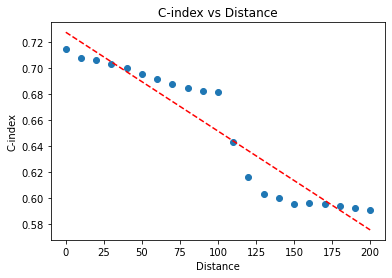

Predictions took 1059.5559649467468 seconds


In [16]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 7-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

start = time.time()

# distances to consider
ranges = np.arange(0,210,10)

cs = [] # list for c-index values

#for debug
#X = X[:100]
#y = y[:100]


for d in ranges:
    print("Predicting...\n")
    loo = spatialLOO(X, cords, d) # LOO generator
    predictions = LOOCV(X,y,loo)

    # Flatten lists and convert to dataframes for c-index
    predictions = pd.DataFrame([val for sublist in predictions for val in sublist])[0]
    y_true = pd.DataFrame([val for sublist in y for val in sublist])[0]
    
    # Progress print outs and c-index calculation
    print(f"Distance ({int(d/10+1)}/21):",d)
    c = cindex(y_true, predictions)
    print("C-index =",c,"\n")
    cs.append(c)


# Plotting
plt.scatter(ranges,cs)
plt.title("C-index vs Distance")
plt.xlabel("Distance")
plt.ylabel("C-index")

# Trendline (linear)
z = np.polyfit(ranges, cs, 1)
p = np.poly1d(z)
plt.plot(ranges,p(ranges),"r--")
print("Trendline:\n")
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

plt.show()


end = time.time()
print(f"Predictions took {end-start} seconds")


### Interpretation of the results

In [9]:
# In this cell, give a brief commentary on the results, what happens to the prediction 
# performance as the prediction distance increases?

# As the prediction distance increases, the performance decays first just a little until around distance 100 where it drops heavily to plateau again
# I added a linear trendline to the plot, but I have a feeling the relation is not linear
